In [10]:
import json
import re

# 读取 JSON 文件
with open('/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/filter_geoqa+_1_10_scalebbox3.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

total_bbox_count = 0
conversation_count = 0

# 遍历每个样本
for sample in data:
    if 'conversations' in sample:
        for conversation in sample['conversations']:
            if conversation['from'] == 'gpt' and '<CAPTION>' in conversation['value']:
                # 正则表达式提取 CAPTION 中的 bbox（例如：[0.0, 0.405, 0.998, 0.705]）
                bboxes = re.findall(r'\[\d+\.\d+,\s*\d+\.\d+,\s*\d+\.\d+,\s*\d+\.\d+\]', conversation['value'])
                total_bbox_count += len(bboxes)
                conversation_count += 1

# 计算平均 bbox 数量
average_bbox_per_conversation = total_bbox_count / conversation_count if conversation_count > 0 else 0

# 输出 bbox 的数量和平均值
print(f"Total number of bounding boxes found: {total_bbox_count}")
print(f"Average number of bounding boxes per conversation: {average_bbox_per_conversation:.2f}")

Total number of bounding boxes found: 129897
Average number of bounding boxes per conversation: 5.44


In [31]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/fego_1_10_scale_bbox3.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

# 统计符合条件和总的边框数量
iou_threshold = 0.5
count_exceeding_threshold = 0
total_boxes = 0

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation or "<REASONING>" not in conversation:
            conversation['<CAPTION>'] = None
            conversation['<REASONING>'] = None

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if items:
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        total_boxes += 1  # 增加总数量5
                        iou = calculate_iou(bbox, reference_box)
                        if iou > iou_threshold:
                            count_exceeding_threshold += 1

# 计算符合条件的框所占的比例
if total_boxes > 0:
    proportion = count_exceeding_threshold / total_boxes
else:
    proportion = 0
print(total_boxes)
print(f"Number of bounding boxes with IoU > {iou_threshold}: {count_exceeding_threshold}")
print(f"Proportion of bounding boxes with IoU > {iou_threshold}: {proportion:.2%}")

135789
Number of bounding boxes with IoU > 0.5: 2070
Proportion of bounding boxes with IoU > 0.5: 1.52%


In [13]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/fego_1_10_scale_bbox3.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

unique_boxes = set()

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation or "<REASONING>" not in conversation:
            conversation['<CAPTION>'] = None
            conversation['<REASONING>'] = None

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if items:
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        # 将bounding box转换为元组并添加到集合中
                        unique_boxes.add(tuple(bbox))

# 打印不重复的框的数量
print(f"Number of unique bounding boxes: {len(unique_boxes)}")

Number of unique bounding boxes: 71489


In [7]:
import json

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/1_10/cogagent/iou3-bbox.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

unique_caption_boxes = set()
total_caption_boxes = 0

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation:
            continue
        
        items = conversation.get("<CAPTION>", [])
        if items:
            for item in items:
                bbox = item.get("bbox", None)
                if bbox is not None:
                    total_caption_boxes += 1
                    unique_caption_boxes.add(tuple(bbox))

# 计算不重复的CAPTION框的数量
num_unique_caption_boxes = len(unique_caption_boxes)
if total_caption_boxes > 0:
    proportion_unique = num_unique_caption_boxes / total_caption_boxes
else:
    proportion_unique = 0

# 打印结果
print(total_caption_boxes)
print(f"Number of unique bounding boxes in <CAPTION>: {num_unique_caption_boxes}")
print(f"Proportion of unique bounding boxes in <CAPTION>: {proportion_unique:.2%}")

48575
Number of unique bounding boxes in <CAPTION>: 30464
Proportion of unique bounding boxes in <CAPTION>: 62.72%


In [5]:
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/cot-1_10-iou3/T20250408_G854caaca/cot-1_10-iou3_MME_auxmatch.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

reference_box = [0, 0, 1, 1]  # The reference box

bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

total_bboxes = 0
num_iou_exceeding_0_7 = 0
iou_threshold = 0.8
total_samples = len(df)

for index, row in df.iterrows():
    answer_text = row['prediction']
    
    # 找到所有bbox
    bboxes = bbox_pattern.findall(answer_text)
    total_bboxes += len(bboxes)

    # 计算IOU并统计符合条件的个数
    for bbox_str in bboxes:
        bbox = list(map(float, bbox_str))
        iou = calculate_iou(bbox, reference_box)
        if iou > 0.8:
            num_iou_exceeding_0_7 += 1

# 计算每个样本中bbox个数的平均值，以及比例
average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
print(total_bboxes)
print(f"Average number of bboxes per sample: {average_bboxes_per_sample}")
print(f"Number of bboxes with IoU > {iou_threshold}: {num_iou_exceeding_0_7}")
print(f"Proportion of bboxes with IoU > {iou_threshold}: {proportion_iou_exceeding:.2%}")

10237
Average number of bboxes per sample: 4.312131423757371
Number of bboxes with IoU > 0.8: 1896
Proportion of bboxes with IoU > 0.8: 18.52%


In [18]:
# mme
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def analyze_samples(subset_df, iou_threshold):
    reference_box = [0, 0, 1, 1]  # Reference box
    bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

    total_bboxes = 0
    num_iou_exceeding_0_7 = 0
    unique_bboxes_set = set()
    total_samples = len(subset_df)

    for index, row in subset_df.iterrows():
        answer_text = row.get('prediction', '')
        
        # 找到所有bbox
        bboxes = bbox_pattern.findall(answer_text)
        total_bboxes += len(bboxes)

        # 计算IOU并统计符合条件的个数
        for bbox_str in bboxes:
            bbox = list(map(float, bbox_str))
            unique_bboxes_set.add(tuple(bbox))  # Add to unique set
            iou = calculate_iou(bbox, reference_box)
            if iou > iou_threshold:  # 使用阈值0.7
                num_iou_exceeding_0_7 += 1

    # 计算统计数据
    average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
    proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
    unique_bboxes_count = len(unique_bboxes_set)
    proportion_unique_bboxes = unique_bboxes_count / total_bboxes if total_bboxes > 0 else 0

    return average_bboxes_per_sample, proportion_iou_exceeding, unique_bboxes_count, proportion_unique_bboxes, total_bboxes

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/llava-cot-1_10_bbox3/T20250403_G854caaca/llava-cot-1_10_bbox3_MME_auxmatch.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 分别分析答对和答错的样本
correct_samples = df[df['score'] == True]
incorrect_samples = df[df['score'] == False]
iou_threshold = 0.7
correct_avg, correct_proportion, correct_unique_count, correct_proportion_unique, correct_total_bboxes = analyze_samples(correct_samples,iou_threshold)
incorrect_avg, incorrect_proportion, incorrect_unique_count, incorrect_proportion_unique, incorrect_total_bboxes = analyze_samples(incorrect_samples,iou_threshold)

# 打印结果
print("Correct Samples:")
print(f"  correct_total_bboxes: {correct_total_bboxes}")
print(f"  Average number of bboxes per sample: {correct_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {correct_proportion:.2%}")
print(f"  Number of unique bounding boxes: {correct_unique_count}")
print(f"  Proportion of unique bounding boxes: {correct_proportion_unique:.2%}")

print("Incorrect Samples:")
print(f"  incorrect_total_bboxes: {incorrect_total_bboxes}")
print(f"  Average number of bboxes per sample: {incorrect_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {incorrect_proportion:.2%}")
print(f"  Number of unique bounding boxes: {incorrect_unique_count}")
print(f"  Proportion of unique bounding boxes: {incorrect_proportion_unique:.2%}")

Correct Samples:
  correct_total_bboxes: 10304
  Average number of bboxes per sample: 5.3471717695900365
  Proportion of bboxes with IoU > 0.7: 7.72%
  Number of unique bounding boxes: 3616
  Proportion of unique bounding boxes: 35.09%
Incorrect Samples:
  incorrect_total_bboxes: 2409
  Average number of bboxes per sample: 5.389261744966443
  Proportion of bboxes with IoU > 0.7: 7.22%
  Number of unique bounding boxes: 827
  Proportion of unique bounding boxes: 34.33%


In [20]:
# mmstar
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def analyze_samples(subset_df,iou_threshold):
    reference_box = [0, 0, 1, 1]  # Reference box
    bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

    total_bboxes = 0
    num_iou_exceeding_0_7 = 0
    unique_bboxes_set = set()
    total_samples = len(subset_df)

    for index, row in subset_df.iterrows():
        answer_text = row.get('prediction', '')
        
        # 找到所有bbox
        bboxes = bbox_pattern.findall(answer_text)
        total_bboxes += len(bboxes)

        # 计算IOU并统计符合条件的个数
        for bbox_str in bboxes:
            bbox = list(map(float, bbox_str))
            unique_bboxes_set.add(tuple(bbox))  # Add to unique set
            iou = calculate_iou(bbox, reference_box)
            if iou > iou_threshold:  # 使用阈值0.7
                num_iou_exceeding_0_7 += 1

    # 计算统计数据
    average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
    proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
    unique_bboxes_count = len(unique_bboxes_set)
    proportion_unique_bboxes = unique_bboxes_count / total_bboxes if total_bboxes > 0 else 0

    return average_bboxes_per_sample, proportion_iou_exceeding, unique_bboxes_count, proportion_unique_bboxes, total_bboxes

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/cot-1_10-iou3/T20250408_G854caaca/cot-1_10-iou3_MMStar_openai_result.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 分别分析答对和答错的样本
correct_samples = df[df['hit'] == 1]
incorrect_samples = df[df['hit'] == 0]
iou_threshold = 0.7
correct_avg, correct_proportion, correct_unique_count, correct_proportion_unique, correct_total_bboxes = analyze_samples(correct_samples, iou_threshold)
incorrect_avg, incorrect_proportion, incorrect_unique_count, incorrect_proportion_unique, incorrect_total_bboxes = analyze_samples(incorrect_samples, iou_threshold)

# 打印结果
print("Correct Samples:")
print(f"  correct_total_bboxes: {correct_total_bboxes}")
print(f"  Average number of bboxes per sample: {correct_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {correct_proportion:.2%}")
print(f"  Number of unique bounding boxes: {correct_unique_count}")
print(f"  Proportion of unique bounding boxes: {correct_proportion_unique:.2%}")

print("Incorrect Samples:")
print(f"  incorrect_total_bboxes: {incorrect_total_bboxes}")
print(f"  Average number of bboxes per sample: {incorrect_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {incorrect_proportion:.2%}")
print(f"  Number of unique bounding boxes: {incorrect_unique_count}")
print(f"  Proportion of unique bounding boxes: {incorrect_proportion_unique:.2%}")

Correct Samples:
  correct_total_bboxes: 2594
  Average number of bboxes per sample: 3.22636815920398
  Proportion of bboxes with IoU > 0.7: 14.80%
  Number of unique bounding boxes: 1185
  Proportion of unique bounding boxes: 45.68%
Incorrect Samples:
  incorrect_total_bboxes: 2357
  Average number of bboxes per sample: 3.3864942528735633
  Proportion of bboxes with IoU > 0.7: 14.76%
  Number of unique bounding boxes: 1096
  Proportion of unique bounding boxes: 46.50%


In [25]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/1_10/cogagent/iou3-scale-bbox.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

iou_threshold = 0.7
filtered_samples = []

for sample_data in data1:
    new_sample = {
        "id": sample_data["id"],
        "image": sample_data["image"],
        "conversations": []
    }
    for conversation in sample_data.get("conversations", []):
        new_conversation = {
            "<CAPTION>": [],
            "<REASONING>": []
        }

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if isinstance(items, list):  # 确保 items 是可迭代的
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        iou = calculate_iou(bbox, reference_box)
                        if iou > iou_threshold:
                            new_conversation[attr].append(item)
                    # else:
                    #     # Keep items without bbox as well
                    #     new_conversation[attr].append(item)

        if new_conversation["<CAPTION>"] or new_conversation["<REASONING>"]:
            new_sample["conversations"].append(new_conversation)

    if new_sample["conversations"]:
        filtered_samples.append(new_sample)

# Save the filtered samples to a new JSON file
output_file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/iou3_7.json'
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    json.dump(filtered_samples, output_file, ensure_ascii=False, indent=4)

print(f"Saved {len(filtered_samples)} samples with relevant items to {output_file_path}")

Saved 40 samples with relevant items to /mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/iou3_7.json


In [28]:
import re
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
def norm2pixel(bbox, width, height):
    final_bbox = [0, 0, 0, 0]
    if width > height:
        final_bbox = [x*width for x in bbox]
        final_bbox[1] -= (width - height) // 2
        final_bbox[3] -= (width - height) // 2
    else:
        final_bbox = [x*height for x in bbox]
        final_bbox[0] -= (height - width) // 2
        final_bbox[2] -= (height - width) // 2
    return final_bbox  # return must be added
def extract_bbox_and_word(segment, prediction, id = 1):
    # 使用正则表达式提取特定标签的内容和边界框
    match = re.search(rf'<{segment}>(.*?)</{segment}>', prediction, re.DOTALL)
    if match:
        content = match.group(1)
        bbox_matches = re.findall(r'(\b\w+\b) \[([\d.]+, [\d.]+, [\d.]+, [\d.]+)\]', content)
        bbox_list = []
        for word, bbox_str in bbox_matches:
            try:
                bbox = list(map(float, bbox_str.split(',')))
                bbox_list.append((word, bbox))
            except ValueError as e:
                print(id)
                print(f"Error parsing bbox coordinates: {bbox_str}. Error: {e}")
                # 当错误发生时，考虑是否应向用户报告以及如何处理
        return bbox_list
    return []

def visualize_sample(df, index_to_visualize):
    row = df.loc[df['index'] == index_to_visualize]
    
    if row.empty:
        print(f"No entry found for index: {index_to_visualize}")
        return

    row = row.iloc[0]
    id = row['index']
    question = row['question']
    answer_col = row['answer']
    answer = row[answer_col]

    print(f'Index: {id}, question: {question}, Answer: {answer}')
    
    image_path = f'/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/images/MMBench/{index_to_visualize}.jpg'
    prediction = row['prediction']
    
    if pd.notnull(prediction):
        caption_bbox_info = extract_bbox_and_word('CAPTION', prediction)
        reasoning_bbox_info = extract_bbox_and_word('REASONING', prediction)

        # 使用不同的颜色来绘制每个框，可以随机选择或按照顺序循环使用预定义的颜色
        colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
        print(caption_bbox_info)
        if caption_bbox_info or reasoning_bbox_info:
            # 显示CAPTION信息中的bbox在图片上
            with Image.open(image_path) as img:
                draw = ImageDraw.Draw(img)
                img_w, img_h = img.size
                for i, (word, bbox) in enumerate(caption_bbox_info):
                    bbox = norm2pixel(bbox, img_w, img_h)
                    color = colors[i % len(colors)]
                    draw.rectangle(bbox, outline=color, width=2)
                    draw.text((bbox[0], bbox[1] + 5), word, fill=color)

                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Index: {index_to_visualize} - CAPTION')
                plt.show()
            print(reasoning_bbox_info)
            # 显示REASONING信息中的bbox在图片上
            with Image.open(image_path) as img:
                draw = ImageDraw.Draw(img)
                for i, (word, bbox) in enumerate(reasoning_bbox_info):
                    bbox = norm2pixel(bbox, img_w, img_h)
                    color = colors[i % len(colors)]
                    draw.rectangle(bbox, outline=color, width=2)
                    draw.text((bbox[0], bbox[1] + 5), word, fill=color)
                
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Index: {index_to_visualize} - REASONING')
                plt.show()
# 加载 Excel 文件
df = pd.read_excel('/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/cot-1_10-iou3-3/T20250411_G854caaca/cot-1_10-iou3-3_MMBench_DEV_EN_openai_result.xlsx')

# 计算有bbox的样本
total_samples = len(df)
samples_with_bbox = 0
indices_with_bbox = []

for idx, row in df.iterrows():
    prediction = row['prediction']
    if pd.notnull(prediction):
        caption_bbox_info = extract_bbox_and_word('CAPTION', prediction, idx)
        reasoning_bbox_info = extract_bbox_and_word('REASONING', prediction, idx)
        if caption_bbox_info or reasoning_bbox_info:
            samples_with_bbox += 1
            indices_with_bbox.append(row['index'])

print(f"Total samples: {total_samples}")
print(f"Samples with bbox: {samples_with_bbox}")
print(f"Proportion: {samples_with_bbox / total_samples:.2%}")

351
Error parsing bbox coordinates: 0.0, 0.0, 0.997, 0..997. Error: could not convert string to float: ' 0..997'
Total samples: 1164
Samples with bbox: 951
Proportion: 81.70%


In [38]:
import random

idex_list = indices_with_bbox.copy()
random.seed(42)
random.shuffle(idex_list)


Index: 1531, question: how many dogs are there？, Answer: 4
[('area', [0.0, 0.0, 0.998, 0.996])]


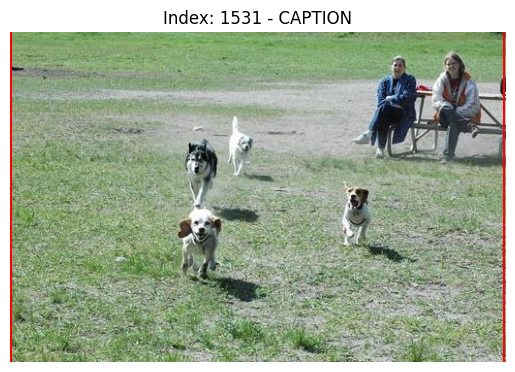

[]


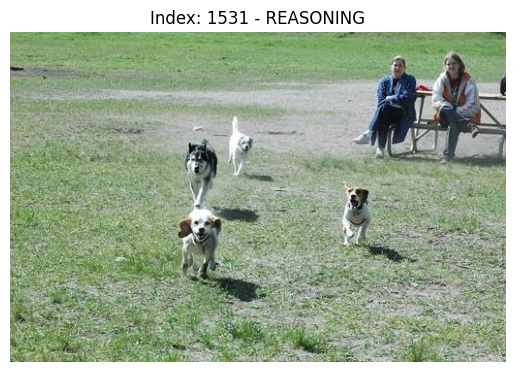

In [61]:

index = 28
visualize_sample(df, idex_list[index])